# Percepton simple
### Pasos 
1. Importar los paquetes necesarios

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

2. Carga de datos

In [5]:

# Función para cargar datos desde un archivo CSV
def load_data(file_path):
    df = pd.read_csv(file_path, header=None)
    data = df.values
    X = data[:, :-1]
    y = data[:, -1]
    return X, y       

3. Entrenar y probar un perceptrón

In [6]:
# Función para entrenar y probar un perceptrón
def train_and_test_perceptron(X_train, y_train, X_test, y_test, learning_rate, max_epochs):
    perceptron = Perceptron(eta0=learning_rate, max_iter=max_epochs, random_state=0)
    perceptron.fit(X_train, y_train)

    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return perceptron, accuracy

4. Mostrar gráficamente los patrones

In [7]:

# Función para mostrar gráficamente los patrones y la recta de separación
def plot_data_and_decision_boundary(X, y, perceptron):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Entrada 1")
    plt.ylabel("Entrada 2")

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    plt.show()

5. Ejecución de programa

Ingrese la tasa de aprendizaje: 0.0001
Ingrese el número máximo de épocas de entrenamiento: 1000
Precisión en el conjunto de prueba: 0.51


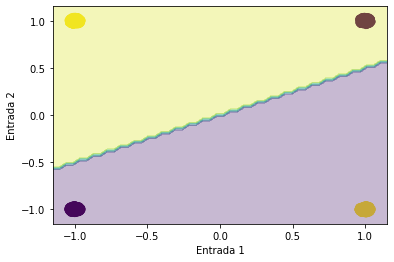

In [12]:

# Lectura de datos de entrenamiento y prueba desde archivos CSV
X_train, y_train = load_data("./data_csv/XOR_trn.csv")
X_test, y_test = load_data("./data_csv/XOR_tst.csv")

# Selección de parámetros
learning_rate = float(input("Ingrese la tasa de aprendizaje: "))
max_epochs = int(input("Ingrese el número máximo de épocas de entrenamiento: "))

# Entrenamiento y prueba del perceptrón
perceptron, accuracy = train_and_test_perceptron(X_train, y_train, X_test, y_test, learning_rate, max_epochs)

print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Mostrar gráficamente los patrones y la recta de separación
plot_data_and_decision_boundary(X_train, y_train, perceptron)